In [1]:
# imports
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, stdev
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, classification_report, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor, Lasso, ElasticNet, Ridge, LinearRegression
from sklearn.svm import SVR

# Data Exploration

In [2]:
data = pd.read_csv("bike_share_hour.csv")

In [3]:
#url = 'https://raw.githubusercontent.com/arjayit/cs4432_data/master/bike_share_hour.csv'
#data = pd.read_csv(url)

In [4]:
print(data.info())
data.head(n=10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [7]:
# Categorical: season, mnth, holiday, weathersit 
data[["season", "mnth", "holiday", "weathersit"]] = data[["season", "mnth", "holiday", "weathersit"]].astype("category")
print(data.info())
data.head(n=10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  int64   
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  int64   
 8   workingday  17379 non-null  int64   
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(4), float64(4), int64(8), object(1)
memory usage: 1.8+ MB
None


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Chosen categorical columns: 
* Season: This is a categorical column, as the year is divided in these 4 categories. It could be cyclical, but there are only two years in the dataset, so there are a total of two cycles for this column, so it may considered to be not relevant
* Mnth: Same reasoning as the previous column. The year is divided in 12 of these categories, and although cyclical, there are only two years. 
* holiday: Boolean variable, but it can be considered two categories. In case different categories are added for different holidays, it would not need to be changed. Other boolean variables were not considered categorical
* weathersit: Purely categorical variable, which is dependent on other columns, such as temp, hum, etc. 

Rejected categorical columns
* dteday: There would be as manny categories as there are days of the year
* yr: Boolean variable
* hr: Cyclic variable
* weekday: another cyclic variable, which is best to leave as is

In [8]:
# It can be observed that there are no null values in the dataset
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Visualization of numerical columns

In [9]:
# It can be seen that the column [instant] works as an index for the dataset
print(min(data.instant))
print(max(data.instant))
print(mean(data.instant))

1
17379
8690


<Axes: xlabel='temp', ylabel='Count'>

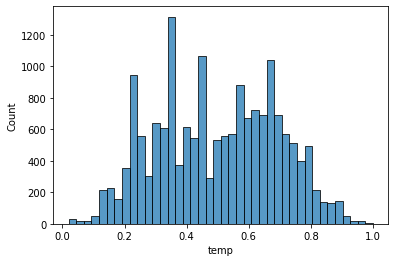

In [10]:
# It can be observed that the temperature follows a normal distribution, mostly. 
# The minimum value of the temperature stays near 0, and the maximum almost reaches 1. This makes sense, as according to the 
# information regarding this column, it has been normalized, and it is the temperature in Celcius.
sns.histplot(data=data, x="temp")

<Axes: xlabel='atemp', ylabel='Count'>

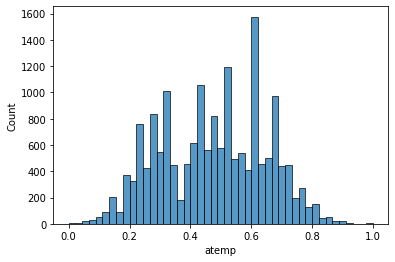

In [11]:
# Similar observations as for the column [temp], but this column describes the feeling of temperature for a person
sns.histplot(data=data, x="atemp")

<Axes: xlabel='hum', ylabel='Count'>

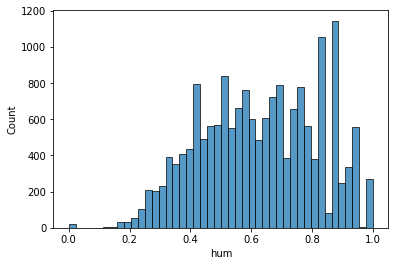

In [12]:
# The observations are simlar to the previous two columns, with the difference that this column describes the humidity in the air
# normalized. Another difference is that, although it is a mostly normal distribution, it is biased to the right. 
sns.histplot(data=data, x="hum")

<Axes: xlabel='windspeed', ylabel='Count'>

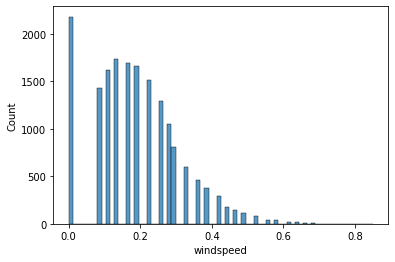

In [13]:
# Normalized column describing the windspeed, with a normal distribution with a bias to the left.
sns.histplot(data=data, x="windspeed")

<Axes: xlabel='casual', ylabel='Count'>

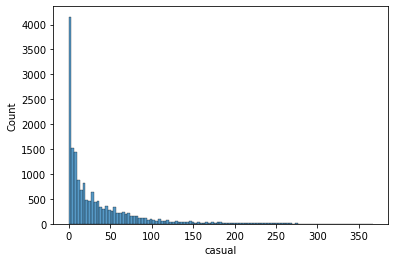

In [14]:
# Similar to an inverted Gaussian or inverted exponential, with most of the values being on the left of the graph. 
sns.histplot(data=data, x="casual")

<Axes: xlabel='registered', ylabel='Count'>

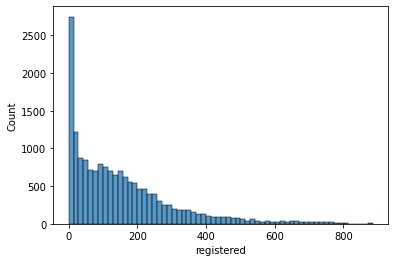

In [15]:
# Similar results as the previous column, but less extreme, with a more equally distributed graph
sns.histplot(data=data, x="registered")

<Axes: xlabel='cnt', ylabel='Count'>

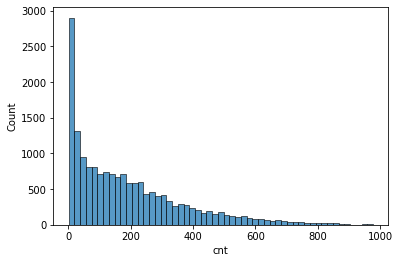

In [16]:
# Similar results to the previous 2 columns. It describes the total bike rental, included both casual and registered users
sns.histplot(data=data, x="cnt")

<Axes: xlabel='cnt', ylabel='season'>

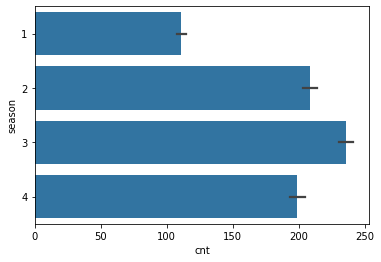

In [17]:
# It can be observed that the season with the most bike rentals is autumn, followed by summer, then winter, and finally spring
sns.barplot(data=data, x="cnt", y="season")

<Axes: xlabel='workingday', ylabel='cnt'>

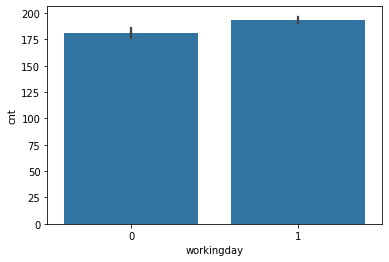

In [18]:
# It can be seen that, although most of the bike rentals are on working days, the difference is not too noticeable 
sns.barplot(data=data, x="workingday", y="cnt")

<Axes: xlabel='mnth', ylabel='cnt'>

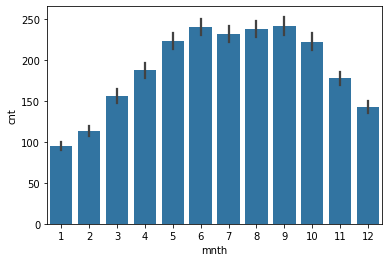

In [19]:
# The months with the most bike rentals are those in the middle of the year: may, june, july, august, september
sns.barplot(data=data, x="mnth", y="cnt")

In [20]:
def monthToSeason(month: int = 0):
    if month < 0 or month > 12:
        raise Exception("Not a valid month")
    else:
        if (month == 12) | (month == 1) | (month == 2):
            return 4
        elif (month == 3) | (month == 4) | (month == 5):
            return 1
        elif (month == 6) | (month == 7) | (month == 8):
            return 2
        elif (month == 9) | (month == 10) | (month == 11):
            return 3
test_month = 2 # February
print(monthToSeason(test_month))

4


<Axes: xlabel='weathersit', ylabel='cnt'>

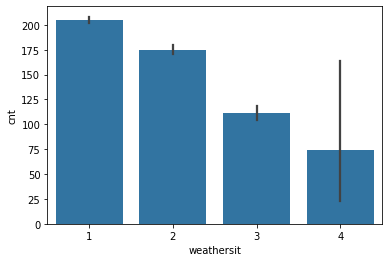

In [21]:
# The weather with the worst bike rentals is 4, which stands for: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
sns.barplot(data=data, x="weathersit", y="cnt")

<Axes: xlabel='weathersit', ylabel='cnt'>

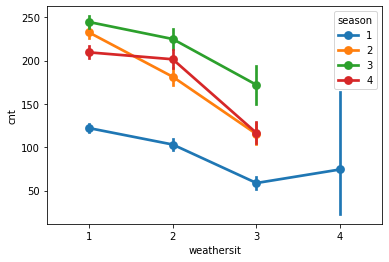

In [22]:
# Seasons 2, 3 and 4 have only weather situation 1, 2, and 3, while season 1, spring, has them all. 
# According to this, spring is the only season with heavy rains, thunderstorms, ice pallets, mist, and fog
sns.pointplot(data=data, x = "weathersit", y = "cnt", hue="season")

<Axes: xlabel='hr', ylabel='cnt'>

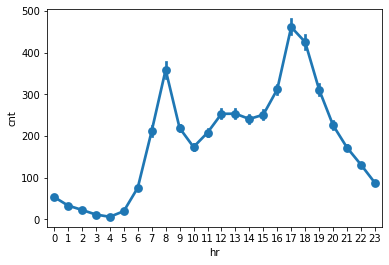

In [23]:
# The busiest hours are between 7 and 9, when people are going to work, and 16 to 18, when people are returning home. 
sns.pointplot(data=data, x = "hr", y = "cnt")

<Axes: xlabel='hr', ylabel='cnt'>

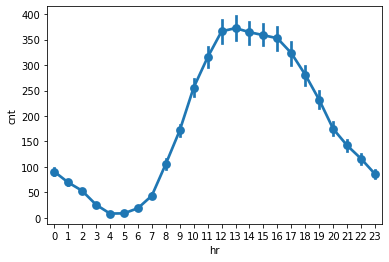

In [24]:
# Graph that shows distribution of rentals on weekends and on holidays
# It can be seen that the very first hours of the morning have very few rentals, and this number starts growing at 8 am,
# steadily until 13, and then starts decreasing. 
# This shouws a stark contrast with the regular business days, as it now follows a more natural sleep cycle of people
sns.pointplot(data=data[(data["workingday"] == 0) | (data["weekday"] == 0)].copy(), x = "hr", y = "cnt")

# Data Preparation

In [25]:
corr = data.corr(numeric_only=True)
corr

,instant,yr,hr,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,-0.004775,0.001357,-0.003416,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,-0.003867,-0.004485,-0.002196,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hr,-0.004775,-0.003867,1.000000,-0.003498,0.002285,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
weekday,0.001357,-0.004485,-0.003498,1.000000,0.035955,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.002196,0.002285,0.035955,1.000000,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
temp,0.136178,0.040913,0.137603,-0.001795,0.055390,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.133750,-0.008821,0.054667,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.083546,-0.276498,-0.037158,0.015688,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.011502,-0.011830,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.142779,0.301202,0.032721,-0.300942,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564


<Axes: >

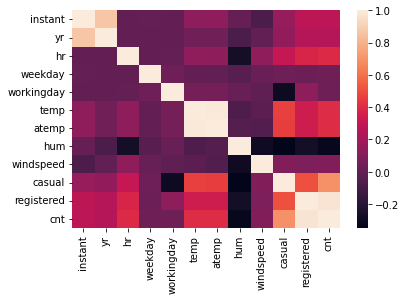

In [26]:
sns.heatmap(corr)

These are the relationships that can be considered to be relevant: 
* cnt and registered are very highly correlated
* temp and atemp are very highly correlated
* hum and cnt are not related
* registered and hum are not related
* casual and hum are not related
* windspeed and hum are not related

everything else is between 1 and 0, with no other interesting relations

In [27]:
# Scaling the numeric columns
scaler = StandardScaler()
numericCols = data.select_dtypes(include=np.number)
scaler.fit(numericCols)
x = scaler.transform(numericCols)
x = pd.DataFrame(data=x, columns= numericCols.columns)
g = data.copy()
data[numericCols.columns] = x[numericCols.columns]
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [28]:
# Now these columns are dropped: casual, registered, dteday, instant
data.drop(["casual", "registered", "dteday", "instant"], inplace=True, axis=1)

<Axes: xlabel='cnt', ylabel='Count'>

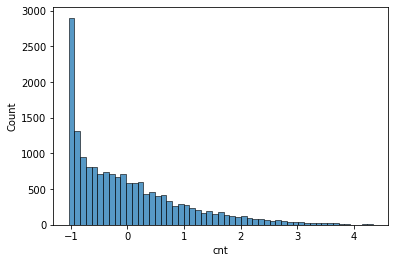

In [29]:
# Histogram of cnt column
sns.histplot(data=data, x="cnt")

It can be seen the distribution is similar to an inverse Gaussian distribution, where the first element has the most repetition, followed by the second, and so on. 

In [30]:
# Splitting data for training
features = data.drop(["cnt"], axis=1).copy()
target = data["cnt"].copy()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=(1/3), random_state=42)

In [31]:
y_train

15993   -0.840562
1830    -0.983905
11054    2.836752
4181    -1.033524
14681    0.025013
           ...   
11284    0.934693
11964    3.432180
5390    -0.002553
860     -0.493229
15795    3.250244
Name: cnt, Length: 11586, dtype: float64

In [32]:
# Baseline linear regression algorithm with cross validation
# For the baseline linear regression algorithm, the simple linear regression in SkLearn was chosen. 
# Cross validation 
base_reg = LinearRegression()
base_reg_pred = cross_validate(base_reg, X_train, y_train, cv=5, 
                               scoring=('r2', 'neg_root_mean_squared_error'),
                               return_train_score=True)

In [33]:
base_reg_pred

{'fit_time': array([0.03811026, 0.00401521, 0.00417256, 0.00389504, 0.00398588]),
 'score_time': array([0.00955033, 0.00396061, 0.00306916, 0.00278401, 0.0052948 ]),
 'test_r2': array([0.37173138, 0.3767673 , 0.41475587, 0.37236251, 0.3928787 ]),
 'train_r2': array([0.39135894, 0.38997339, 0.38033495, 0.39138358, 0.38608197]),
 'test_neg_root_mean_squared_error': array([-0.78598516, -0.77766218, -0.78212004, -0.81536312, -0.78645139]),
 'train_neg_root_mean_squared_error': array([-0.78941353, -0.79154657, -0.79044175, -0.78196722, -0.78933074])}

In [34]:
print("R2: {}".format(mean(base_reg_pred["test_r2"])))
print("Root mean squared error: {}".format(abs(mean(base_reg_pred["test_neg_root_mean_squared_error"]))))

R2: 0.3856991507891546
Root mean squared error: 0.7895163773128626


# Model Training

In [35]:
# One-hot encoding categorical columns
categoricalCols = data.select_dtypes(include='category')
categoricalCols

,season,mnth,holiday,weathersit
0,1,1,0,1
1,1,1,0,1
2,1,1,0,1
3,1,1,0,1
4,1,1,0,1
...,...,...,...,...
17374,1,12,0,2
17375,1,12,0,2
17376,1,12,0,1
17377,1,12,0,1


In [36]:
# Categorical columns have been one-hot encoded
data = pd.get_dummies(data=data, columns= categoricalCols.columns)
data

,yr,hr,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_1,...,mnth_9,mnth_10,mnth_11,mnth_12,holiday_0,holiday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,-1.005134,-1.670004,1.493891,-1.46690,-1.334648,-1.093281,0.947372,-1.553889,-0.956339,True,...,False,False,False,False,True,False,True,False,False,False
1,-1.005134,-1.525374,1.493891,-1.46690,-1.438516,-1.181732,0.895539,-1.553889,-0.824022,True,...,False,False,False,False,True,False,True,False,False,False
2,-1.005134,-1.380744,1.493891,-1.46690,-1.438516,-1.181732,0.895539,-1.553889,-0.868128,True,...,False,False,False,False,True,False,True,False,False,False
3,-1.005134,-1.236115,1.493891,-1.46690,-1.334648,-1.093281,0.636370,-1.553889,-0.972879,True,...,False,False,False,False,True,False,True,False,False,False
4,-1.005134,-1.091485,1.493891,-1.46690,-1.334648,-1.093281,0.636370,-1.553889,-1.039037,True,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.994892,1.077962,-0.998987,0.68171,-1.230779,-1.269602,-0.141137,-0.211691,-0.388478,True,...,False,False,False,True,True,False,False,True,False,False
17375,0.994892,1.222591,-0.998987,0.68171,-1.230779,-1.269602,-0.141137,-0.211691,-0.553875,True,...,False,False,False,True,True,False,False,True,False,False
17376,0.994892,1.367221,-0.998987,0.68171,-1.230779,-1.269602,-0.141137,-0.211691,-0.548361,True,...,False,False,False,True,True,False,True,False,False,False
17377,0.994892,1.511851,-0.998987,0.68171,-1.230779,-1.181732,-0.348473,-0.456099,-0.708245,True,...,False,False,False,True,True,False,True,False,False,False


In [37]:
# Splitting data for training
features = data.drop(["cnt"], axis=1).copy()
target = data["cnt"].copy()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=(1/3), random_state=42)

In [38]:
# Baseline linear regression algorithm with cross validation after using get_dummies
# Cross validation 
base_reg = LinearRegression()
base_reg_pred = cross_validate(base_reg, X_train, y_train, cv=5, 
                               scoring=('r2', 'neg_root_mean_squared_error'),
                               return_train_score=True)

In [39]:
print("R2: {}".format(mean(base_reg_pred["test_r2"])))
print("Root mean squared error: {}".format(-mean(base_reg_pred["test_neg_root_mean_squared_error"])))

R2: 0.4019607690320277
Root mean squared error: 0.7789886085251962


## Decision Tree Regressor

In [40]:
decision_tree_regressor = DecisionTreeRegressor(random_state=0)
decision_tree_score = cross_validate(decision_tree_regressor, X_train, y_train, cv=5, 
                               scoring=('r2', 'neg_root_mean_squared_error'),
                               return_train_score=True)

In [41]:
print("R2: {}".format(mean(decision_tree_score["test_r2"])))
print("Root mean squared error: {}".format(-mean(decision_tree_score["test_neg_root_mean_squared_error"])))

R2: 0.8758581307154056
Root mean squared error: 0.35429999915844046


## Random Forest Regressor

In [42]:
random_forest_regressor = RandomForestRegressor(random_state=0, n_estimators = 30)
random_forest_score = cross_validate(random_forest_regressor, X_train, y_train, cv=5, 
                               scoring=('r2', 'neg_root_mean_squared_error'),
                               return_train_score=True)

In [43]:
print("R2: {}".format(mean(random_forest_score["test_r2"])))
print("Root mean squared error: {}".format(-mean(random_forest_score["test_neg_root_mean_squared_error"])))

R2: 0.9339490929017427
Root mean squared error: 0.25849781894973406


## SGD Regressor

In [44]:
sgd_reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd_reg_score = cross_validate(sgd_reg, X_train, y_train, cv=5, 
                               scoring=('r2', 'neg_root_mean_squared_error'),
                               return_train_score=True)

In [45]:
print("R2: {}".format(mean(sgd_reg_score["test_r2"])))
print("Root mean squared error: {}".format(-mean(sgd_reg_score["test_neg_root_mean_squared_error"])))

R2: -166.25045045677678
Root mean squared error: 8.286453410882824


## Lasso regressor

In [46]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg_score = cross_validate(sgd_reg, X_train, y_train, cv=5, 
                               scoring=('r2', 'neg_root_mean_squared_error'),
                               return_train_score=True)

In [47]:
print("R2: {}".format(mean(lasso_reg_score["test_r2"])))
print("Root mean squared error: {}".format(-mean(lasso_reg_score["test_neg_root_mean_squared_error"])))

R2: -153.92105029531368
Root mean squared error: 8.840546084611477


## ElasticNet regression

In [48]:
elasticnet_reg = ElasticNet(random_state=0)
elasticnet_reg_score = cross_validate(elasticnet_reg, X_train, y_train, cv=5, 
                               scoring=('r2', 'neg_root_mean_squared_error'),
                               return_train_score=True)

In [49]:
print("R2: {}".format(mean(elasticnet_reg_score["test_r2"])))
print("Root mean squared error: {}".format(-mean(elasticnet_reg_score["test_neg_root_mean_squared_error"])))

R2: -0.0006285453541635011
Root mean squared error: 1.0078323424095648


## Ridge Regressor

In [50]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg_reg_score = cross_validate(ridge_reg, X_train, y_train, cv=5, 
                               scoring=('r2', 'neg_root_mean_squared_error'),
                               return_train_score=True)

In [51]:
print("R2: {}".format(mean(ridge_reg_reg_score["test_r2"])))
print("Root mean squared error: {}".format(-mean(ridge_reg_reg_score["test_neg_root_mean_squared_error"])))

R2: 0.4019572685808305
Root mean squared error: 0.7789910074602242


## Bagging Regressor

In [52]:
#bagging_reg = BaggingRegressor(estimator=SVR(), random_state=0)
bagging_reg = BaggingRegressor(random_state=0)
bagging_reg_reg_score = cross_validate(bagging_reg, X_train, y_train, cv=5, 
                               scoring=('r2', 'neg_root_mean_squared_error'),
                               return_train_score=True)

In [53]:
print("R2: {}".format(mean(bagging_reg_reg_score["test_r2"])))
print("Root mean squared error: {}".format(-mean(bagging_reg_reg_score["test_neg_root_mean_squared_error"])))

R2: 0.92731354153887
Root mean squared error: 0.27118410582478897


By taking and comparing every score of the regressors, we can take the best 3: 
* Bagging Regressor
* Random Forest
* Decision Tree

# Model Tuning

By performing cross validation in the 3 models, it can be observed that the best performing model is Random Forest Regressor if we take RMSE as the criteria. 

In [54]:
parameters = {"bootstrap":[True, False], 
              "max_depth": [10,20,30,40,50,60,70,80,90,100, 110],
              "max_features": [1.0, "sqrt"],
              "min_samples_split": [2,5,10],
              "min_samples_leaf": [1,2,4],
              "n_estimators": [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
             }
n_jobs = 7

In [55]:
rand_for_reg = RandomForestRegressor(random_state=0)
rs = RandomizedSearchCV(rand_for_reg, param_distributions=parameters, n_jobs=n_jobs)
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_jobs=7,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [56]:
random_best_estimator = rs.best_estimator_
random_best_estimator

RandomForestRegressor(max_depth=70, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1600, random_state=0)

In [57]:
best_random_res = cross_validate(random_best_estimator, X_train, y_train, cv=5, 
                               scoring=('r2', 'neg_root_mean_squared_error', "neg_mean_squared_error"),
                               return_train_score=True)

In [58]:
keys = best_random_res.keys()
for key in keys:
    print(key)
    print(abs(mean(best_random_res[key])))

fit_time
32.44646577835083
score_time
0.3981000900268555
test_r2
0.9334164920108112
train_r2
0.9713583391584364
test_neg_root_mean_squared_error
0.2596066878296672
train_neg_root_mean_squared_error
0.17053901776720343
test_neg_mean_squared_error
0.06752999606593925
train_neg_mean_squared_error
0.029086665597262217


The test root mean squared error for the original Random Forest Regressor was 0.25849781894973406
The test root mean squared error for our best predictor is 0.2596066878296672
Therefore, we can say that the original random forest regressor was slightly better than our best predictor obtained through the randomized search CV. 
However, it is still better than the other models.

In [59]:
# Finally, some predictions are run on the test set. 
test_regressor = random_best_estimator
test_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=70, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1600, random_state=0)

In [60]:
predicted = test_regressor.predict(X_test)
print("R2 Score: {}".format(r2_score(y_test, predicted)))
print("RMSE: {}".format(np.square(mean_squared_error(y_test, predicted, squared=False))))

R2 Score: 0.9411739622563015
RMSE: 0.05693333230304984


It can be observed that the RMSE value is very low, which indicates that the model does a great job at predictions. 